<a href="https://colab.research.google.com/github/Wallace-NMelo/Fotografia-Computacional/blob/main/AM_DeepLearning/WallaceN_Modulo01_Exemplo_pratico_03_Introducao_ao_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo para classificação de imagens com o algoritmo SGD, utilizando o dataset "digits":

In [1]:
# Importando as bibliotecas necessárias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregando o conjunto de dados Digits (números escritos à mão)
digits = datasets.load_digits()

# extraindo os dados e as labels
X_digits = digits.data
y_digits = digits.target

In [3]:
# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

print("Número de amostras de treino:", len(X_train))
print("Número de amostras de teste:", len(X_test))

Número de amostras de treino: 1437
Número de amostras de teste: 360


In [4]:
# Criando o modelo
sgd_classifier = SGDClassifier(max_iter=1000, random_state=42)

# iniciando o processo de treinamento
# A API do sklearn possui uma interface padrão para todos os modelos do framework
# Chamamos a função fit da classe passando como parâmetro os exemplos e os labels
# Podemos customizar os parâmetros da função fit
# Cada algoritmo ou modelo possui parâmetros específicos
# Consulte a API do modelo para descobrir as customizações disponíveis
sgd_classifier.fit(X_train, y_train)

# Utilizamos o predict para fazer predições no conjunto de teste
# Passamos apenas os exemplos sem o rotulo
# Podemos comparar posteriormente as predições geradas com o valor esperado
y_pred = sgd_classifier.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do SGDClassifier no conjunto de teste:", accuracy)

Acurácia do SGDClassifier no conjunto de teste: 0.9555555555555556


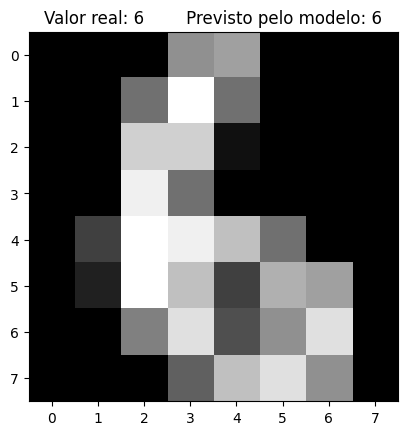

In [5]:
# Realizando uma predição e visualizando o resultado

# Selecionar uma amostra aleatória do conjunto de teste
sample_index = np.random.randint(0, len(X_test))
sample_image = X_test[sample_index].reshape(8, 8)  # Os dígitos são imagens de 8x8 pixels
true_label = y_test[sample_index]

# Fazer a predição para a amostra selecionada
predicted_label = sgd_classifier.predict([X_test[sample_index]])[0]

# Visualizar a imagem e a predição
plt.imshow(sample_image, cmap='gray')
plt.title(f"Valor real: {true_label}        Previsto pelo modelo: {predicted_label}")
plt.show()

# Validação cruzada do modelo:



In [6]:
# Realizar a validação cruzada com 5 folds
cross_val_scores = cross_val_score(sgd_classifier, digits.data, digits.target, cv=5, scoring='accuracy')

# Exibir as pontuações de validação cruzada
print("Pontuações de Validação Cruzada:", cross_val_scores)

# Exibir a média e o desvio padrão das pontuações
print(f"Acurácia Média: {np.mean(cross_val_scores):.2f}")
print(f"Desvio Padrão: {np.std(cross_val_scores):.2f}")

Pontuações de Validação Cruzada: [0.93055556 0.86666667 0.95543175 0.96657382 0.86908078]
Acurácia Média: 0.92
Desvio Padrão: 0.04


# Normalização e encoding(one-hot):



In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Criar um conjunto de dados de exemplo
dados = pd.DataFrame({
    'idade': [25, 30, 35, 40],
    'gênero': ['F', 'M', 'F', 'M'],
    'salário': [50000, 80000, 60000, 70000],
    'classe': ['A', 'B', 'A', 'B']
})

# Dividir os dados em recursos (X) e rótulos (y)
X = dados.drop('classe', axis=1)
y = dados['classe']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Definir as colunas a serem normalizadas e as a serem one-hot encoded
numeric_features = ['idade', 'salário']
categorical_features = ['gênero']

# Criar um transformador para aplicar normalização e one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicar as transformações aos dados
X_transformed = preprocessor.fit_transform(X)

# Exibir coluna por coluna dos dados transformados
print("Dados originais:")
print(X)

# Coluna 1: 'idade' (Normalizada)
print("\nColuna 1 ('idade') após normalização:")
print(X_transformed[:, 0])

# Coluna 2: 'salário' (Normalizada)
print("\nColuna 2 ('salário') após normalização:")
print(X_transformed[:, 1])

# Colunas 3 e 4: 'gênero' (One-hot encoded)
print("\nColunas 3 e 4 ('gênero') após one-hot encoding:")
print(X_transformed[:, 2:])  # A partir da coluna 2 até o final

# Conjunto de dados final:
print("\n Matriz final: \n"+str(X_transformed))

# Observação: A ordem das colunas pode variar dependendo da ordem de aplicação das transformações.

Dados originais:
   idade gênero  salário
0     25      F    50000
1     30      M    80000
2     35      F    60000
3     40      M    70000

Coluna 1 ('idade') após normalização:
[0.         0.33333333 0.66666667 1.        ]

Coluna 2 ('salário') após normalização:
[0.         1.         0.33333333 0.66666667]

Colunas 3 e 4 ('gênero') após one-hot encoding:
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]

 Matriz final: 
[[0.         0.         1.         0.        ]
 [0.33333333 1.         0.         1.        ]
 [0.66666667 0.33333333 1.         0.        ]
 [1.         0.66666667 0.         1.        ]]


# Regressão Logística:

In [8]:
# Carregando um conjunto de dados para o exemplo
iris = datasets.load_iris()
X = iris.data[:, :2]  # Vamos usar apenas duas características para facilitar a visualização
y = (iris.target != 0) * 1  # Transformando em um problema de classificação binária

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Inicializando o modelo de regressão logística
model = LogisticRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = np.mean(y_pred == y_test)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 100.00%


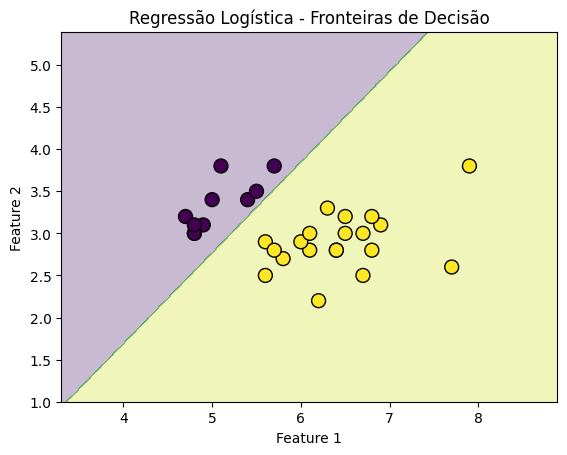

In [10]:
# Visualizando as fronteiras de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=100, linewidth=1)
plt.title("Regressão Logística - Fronteiras de Decisão")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## MLPClassifier do Sklearn exemplo com classificação categorica de duas classes.

In [11]:
# Gerando dados de exemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

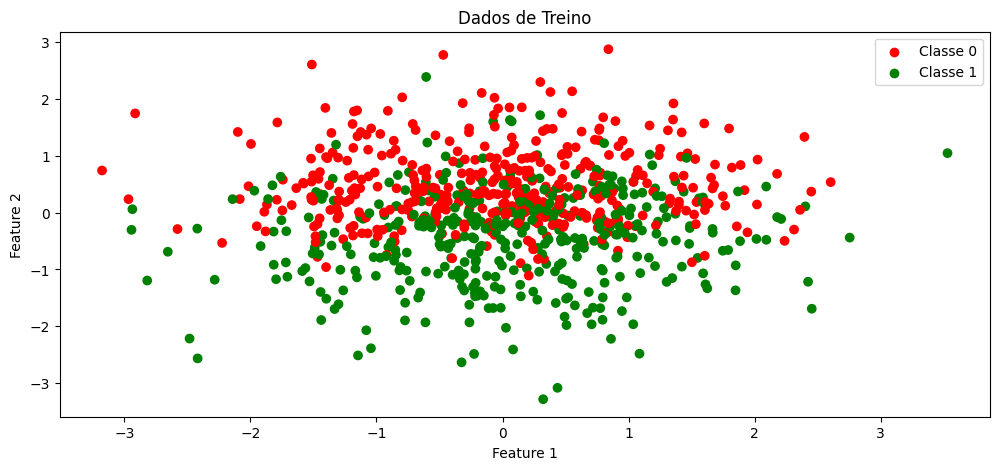

In [12]:
# Plotando os dados de treino
plt.figure(figsize=(12, 5))

# Mapeamento das classes para cores
color_map = {0: 'red', 1: 'green'}

# Usando 'c' para fornecer cores diretamente
plt.scatter(X_train[:, 0], X_train[:, 1], c=[color_map[label] for label in y_train])

plt.title('Dados de Treino')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Adicionando a legenda
for class_label, color in color_map.items():
    plt.scatter([], [], c=color, label=f'Classe {class_label}')

plt.legend()
plt.show()

In [13]:
# Crie o classificador MLP
classificador = MLPClassifier(hidden_layer_sizes=(100,), max_iter=800, random_state=42)

# Treine o classificador
classificador.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = classificador.predict(X_test)

# Avalie a precisão do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia}')

Acurácia: 0.825


In [14]:
# Gerar um novo dado de exemplo para previsão
novo_dado = np.random.rand(1, 20)

# Realizar a previsão do novo dado
previsao = classificador.predict(novo_dado)

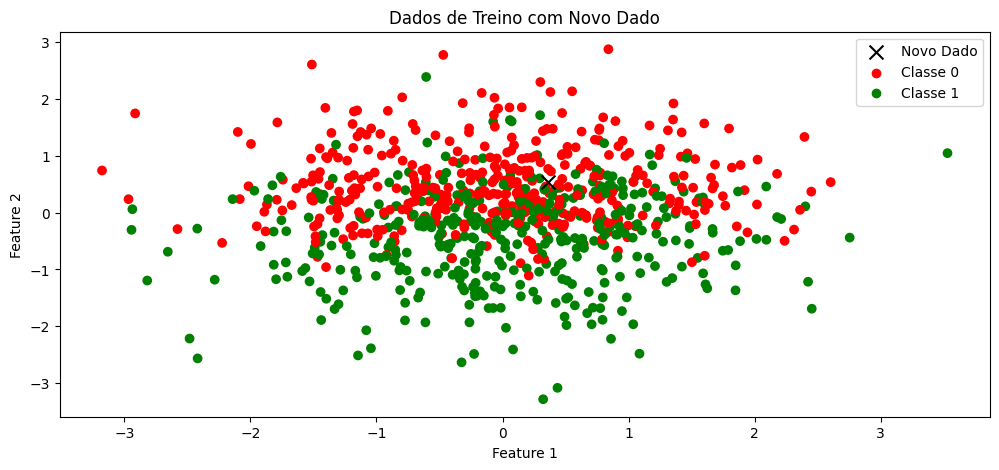

Previsão da Classe para o Novo Dado: 0


In [15]:
# Plotar os dados de treino
plt.figure(figsize=(12, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=[color_map[label] for label in y_train])

# Adicionar o novo dado à plotagem
plt.scatter(novo_dado[:, 0], novo_dado[:, 1], c='black', marker='x', s=100, label='Novo Dado')

plt.title('Dados de Treino com Novo Dado')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Adicionar a legenda
for class_label, color in color_map.items():
    plt.scatter([], [], c=color, label=f'Classe {class_label}')

# Exibir a plotagem
plt.legend()
plt.show()

# Exibir a previsão da classe do novo dado
print(f'Previsão da Classe para o Novo Dado: {previsao[0]}')

## Exercícíos

Replique os resultados deste colab utilizando o dataset lfw do sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people

1 - Escolha 3 modelos de classificação disponível na API do sklearn. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

2 - Carregue o dataset e separe as partições de treino, validação e teste.

3 - Visualize os dados e as classes com base nos rotulos

4 - Realize o processamento dos dados se necessário

5 - Treine os modelos com os dados obtidos

6 - Realize avaliações no conjunto de teste e compare os resultados dos modelos
